In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
import matplotlib.animation as animation

from pathlib import Path

In [2]:
processed_Data_Folder = Path.cwd().joinpath('processed')
df_FallAllD = pd.read_pickle(processed_Data_Folder.joinpath('FallAllD-Preliminary.pkl'))
df_SisFall = pd.read_pickle(processed_Data_Folder.joinpath('SisFall-Preliminary.pkl'))
df_UMAFall = pd.read_pickle(processed_Data_Folder.joinpath('UMAFall-Preliminary.pkl'))

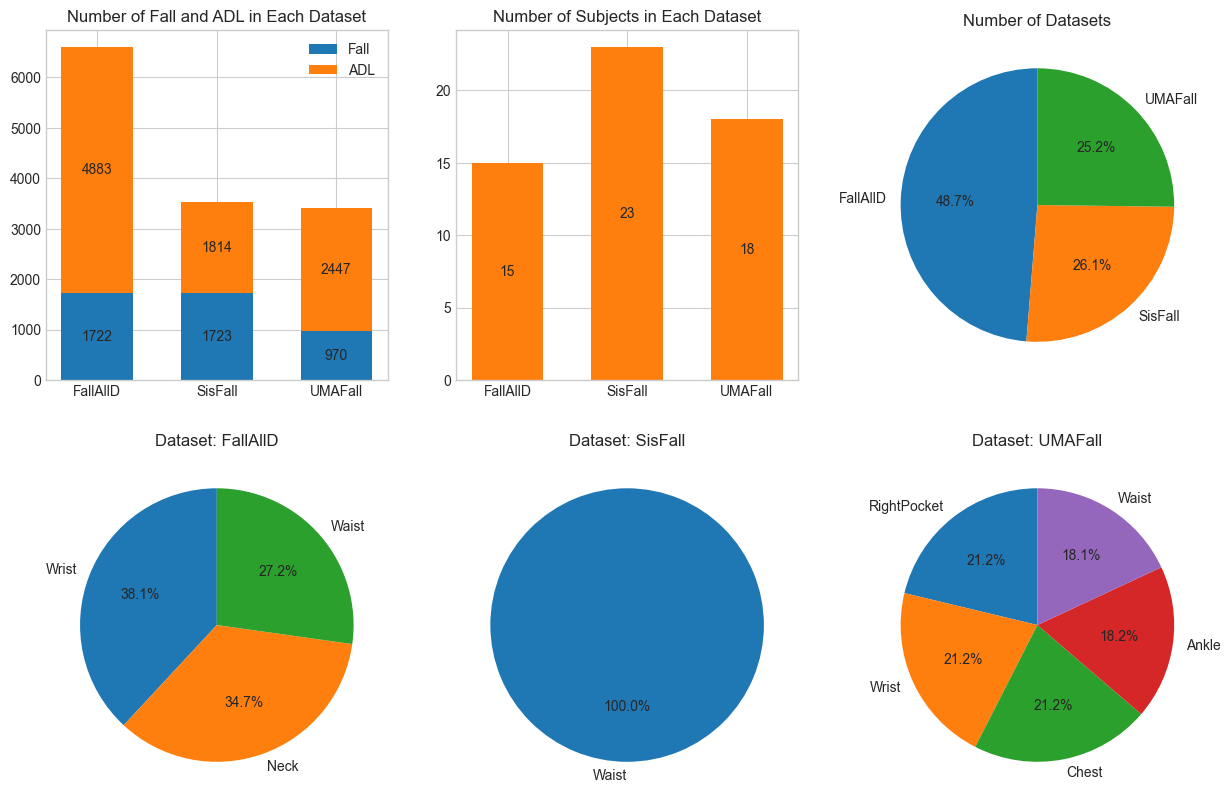

In [3]:
"""
1. Plot the number of fall and ADL in each dataset
2. Plot the number of subjects in each dataset
3. Plot the number of datasets
4. Plot device location in each dataset
"""

dataset = ('FallAllD', 'SisFall', 'UMAFall')
motion_counts = {
    'Fall': np.array([
        df_FallAllD[df_FallAllD['Activity'] == 'Fall'].shape[0], 
        df_SisFall[df_SisFall['Activity'] == 'Fall'].shape[0], 
        df_UMAFall[df_UMAFall['Activity'] == 'Fall'].shape[0]]),
    'ADL': np.array([
        df_FallAllD[df_FallAllD['Activity'] == 'ADL'].shape[0], 
        df_SisFall[df_SisFall['Activity'] == 'ADL'].shape[0], 
        df_UMAFall[df_UMAFall['Activity'] == 'ADL'].shape[0]]),
}
subject_counts = (
    df_FallAllD['SubjectID'].nunique(),
    df_SisFall['SubjectID'].nunique(),
    df_UMAFall['SubjectID'].nunique()
)
dataset_counts = (df_FallAllD.shape[0], df_SisFall.shape[0], df_UMAFall.shape[0])

fig, ax = plt.subplots(2, 3, figsize=(15, 10))
bottom = np.zeros(3)
# red, blue, green, yellow, purple, orange
colors = ["#D32F2F", "#1976D2", "#388E3C", "#FBC02D", "#8E24AA", "#F57C00"]

for motion, motion_count in motion_counts.items():
    p1 = ax[0, 0].bar(dataset, motion_count, width=0.6, label=motion, bottom=bottom)
    bottom += motion_count
    ax[0, 0].bar_label(p1, label_type='center')

ax[0, 0].set_title('Number of Fall and ADL in Each Dataset')
ax[0, 0].legend()

for i, df in enumerate([df_FallAllD, df_SisFall, df_UMAFall]):
    ax[1, i].set_title(f"Dataset: {dataset[i]}")
    df['Device'].value_counts().plot(kind='pie', ax=ax[1, i], autopct='%1.1f%%', startangle=90)
    ax[1, i].get_yaxis().set_visible(False)

p2 = ax[0, 1].bar(dataset, subject_counts, width=0.6, color='#ff7f0e')
ax[0, 1].bar_label(p2, label_type='center')
ax[0, 1].set_title('Number of Subjects in Each Dataset')

ax[0, 2].pie(dataset_counts, labels=dataset, autopct='%1.1f%%', startangle=90)
ax[0, 2].set_title('Number of Datasets')

plt.show()

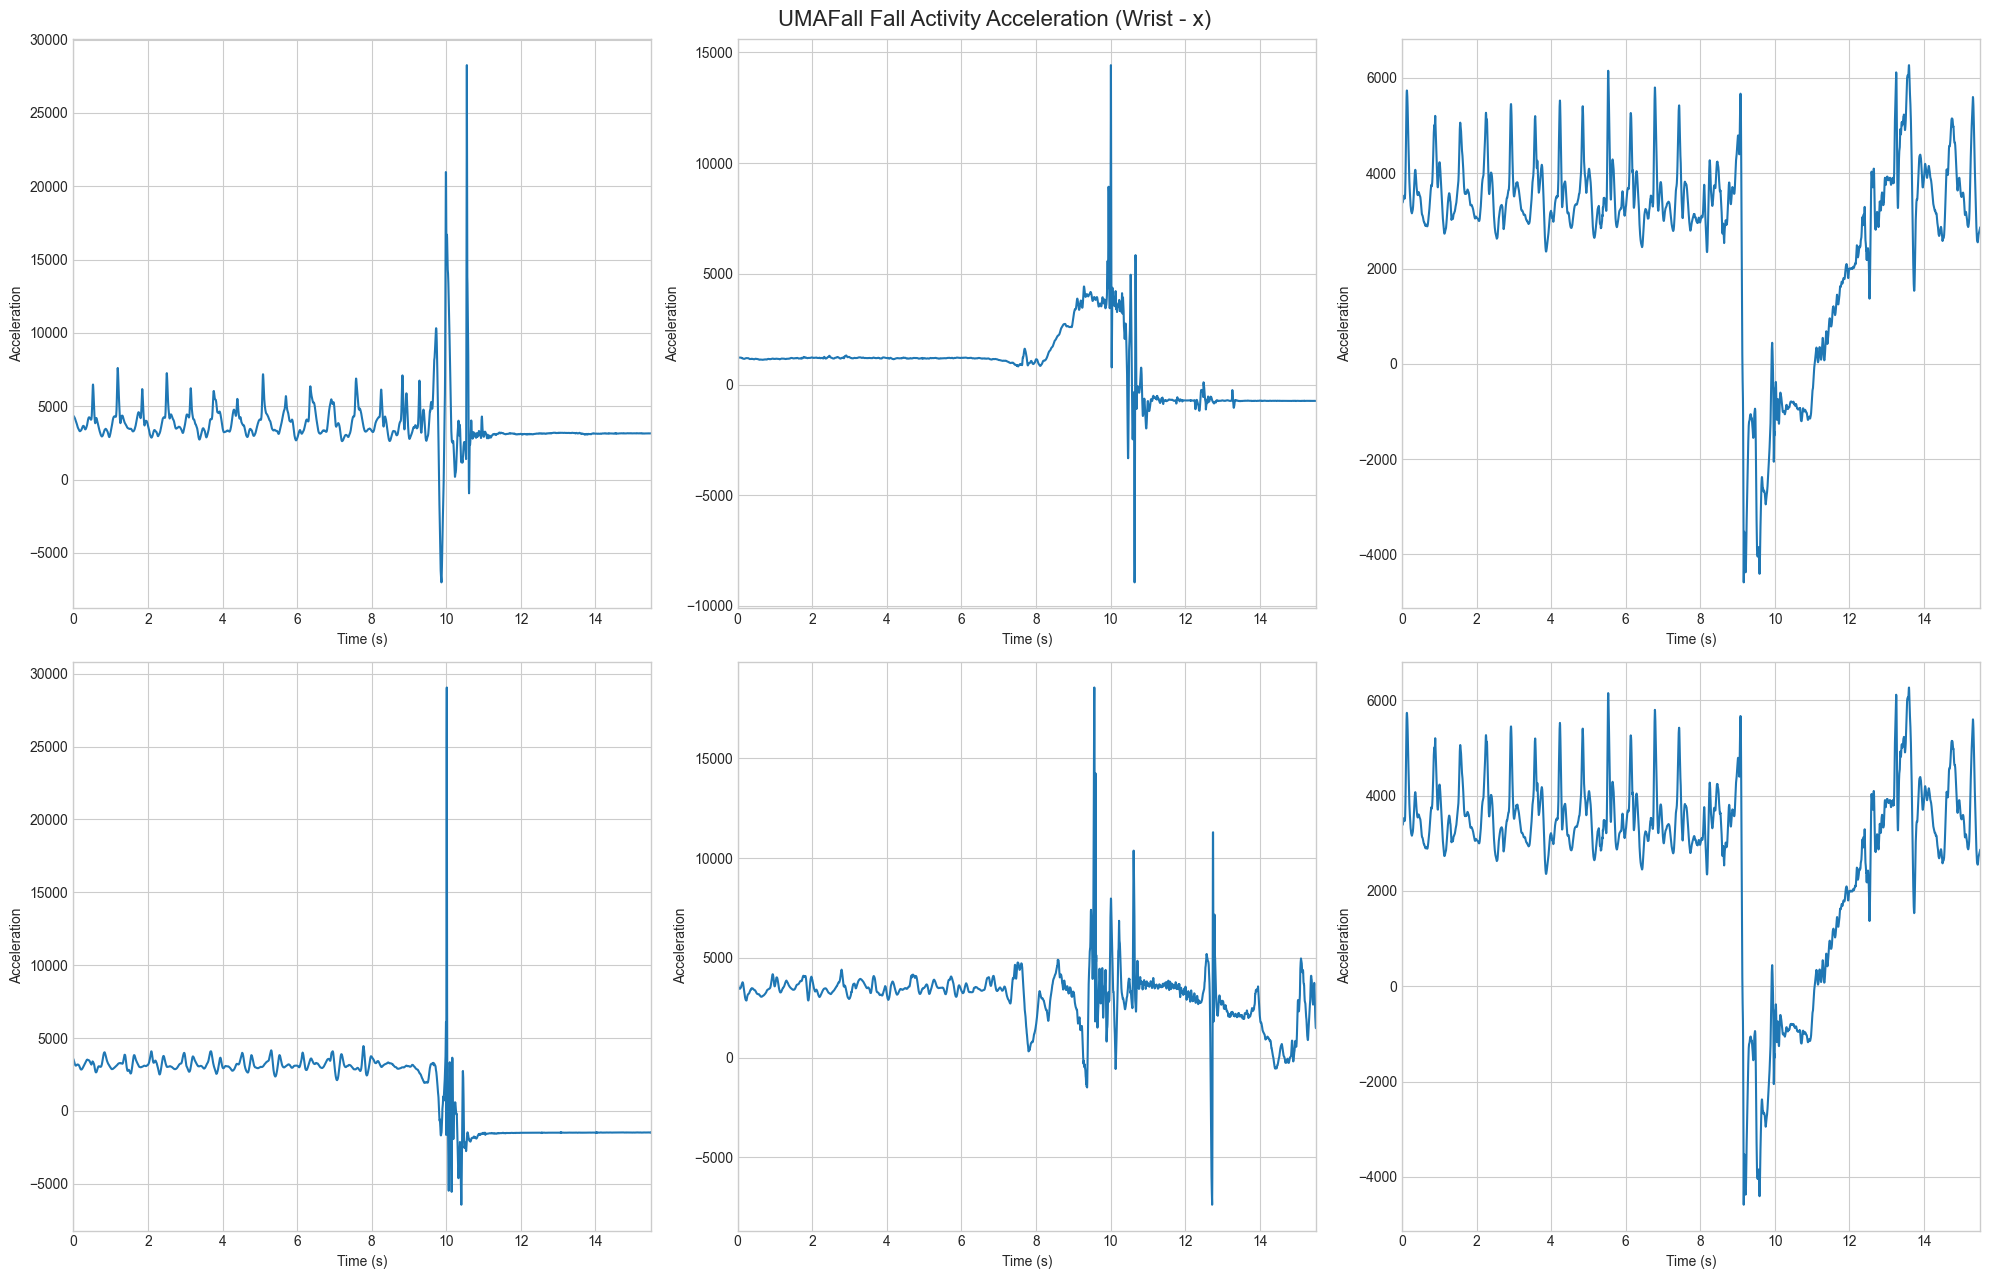

In [15]:
"""
Plot Fall Accerlation of the dataset (Wrist - x)
"""
# sr = 20
# df = df_UMAFall[df_UMAFall['Device'] == 'Wrist']

sr = 238
df = df_FallAllD[df_FallAllD['Device'] == 'Wrist']

df = df[df['Activity'] == 'Fall']
df.reset_index(drop=True, inplace=True)

fig, axs = plt.subplots(2, 3, figsize=(20, 13))
axs = axs.flatten()
for i, v in enumerate(np.random.randint(0, df.shape[0], 6)):
    x = np.arange(0, df.loc[v, 'Acc'].shape[0], 1) / sr
    y = df.loc[v, 'Acc'][:, 0].tolist()
    axs[i].plot(x, y)
    axs[i].set_xlabel('Time (s)')
    axs[i].set_ylabel('Acceleration')
    axs[i].set_xlim(0, 15.5)
fig.suptitle(f"UMAFall Fall Activity Acceleration (Wrist - x)", fontsize=16)
plt.tight_layout()
plt.show()